<a href="https://colab.research.google.com/github/crazyandiee/ride-sharing-demand-forecasting/blob/main/Notebooks/Notebook_02_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p data/raw data/processed data/merged notebooks

In [2]:
# Upload taxi + weather csv
from google.colab import files
files.upload()

Saving nyc_demand_weather_merged.csv to nyc_demand_weather_merged.csv
Saving nyc_hourly_demand.csv to nyc_hourly_demand.csv
Saving nyc_hourly_weather.csv to nyc_hourly_weather.csv


{'nyc_demand_weather_merged.csv': b'pickup_hour,trip_count,tmpf,dwpf,relh,sknt,mslp,p01i\n2023-01-01 01:00:00,87,53.0,51.0,92.89,6.0,1007.2,0.0\n2023-01-01 02:00:00,85,51.5,49.5,92.5,6.0,1007.2,0.0\n2023-01-01 03:00:00,70,49.0,47.0,92.77,5.0,1008.1,0.0\n2023-01-01 04:00:00,33,48.0,46.0,92.74,4.0,1008.4,0.0\n2023-01-01 05:00:00,23,49.0,47.0,92.77,7.0,1008.9,0.0\n2023-01-01 06:00:00,13,48.0,46.0,92.74,9.0,1009.8,0.0\n2023-01-01 07:00:00,23,48.0,46.0,92.74,8.0,1010.6,0.0\n2023-01-01 08:00:00,25,47.0,44.0,89.92,9.0,1011.6,0.0\n2023-01-01 09:00:00,39,51.0,46.0,82.62,5.0,1012.1,0.0\n2023-01-01 10:00:00,46,54.0,43.0,66.24,10.0,1013.6,0.0\n2023-01-01 11:00:00,69,55.0,41.0,59.13,13.0,1014.0,0.0\n2023-01-01 12:00:00,73,56.0,38.0,50.71,8.0,1013.3,0.0\n2023-01-01 13:00:00,76,56.0,35.0,45.4,16.0,1013.6,0.0\n2023-01-01 14:00:00,71,57.0,33.0,40.28,10.0,1013.3,0.0\n2023-01-01 15:00:00,99,57.0,32.0,38.54,9.0,1013.7,0.0\n2023-01-01 16:00:00,96,57.0,33.0,40.28,8.0,1014.1,0.0\n2023-01-01 17:00:00,77,54.0,

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load merged dataset
df = pd.read_csv("/content/data/merged/nyc_demand_weather_merged.csv")

# Convert pickup_hour back to datetime
df['pickup_hour'] = pd.to_datetime(df['pickup_hour'])

# Define NYC Taxi theme
nyc_yellow = "#F3C200"
nyc_black = "#000000"

plt.style.use('ggplot')


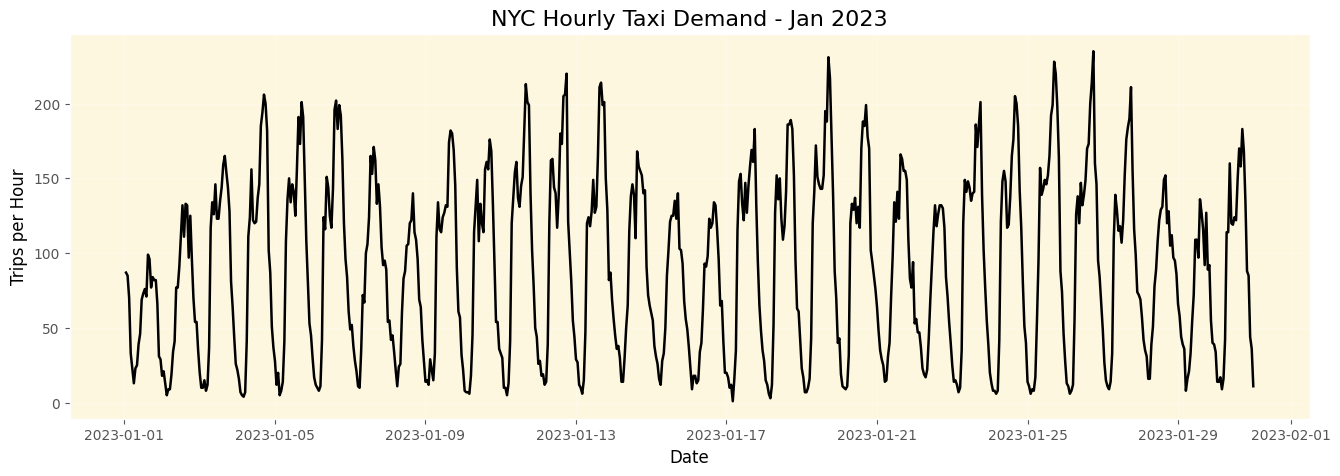

In [6]:
plt.figure(figsize=(16,5))
plt.plot(df['pickup_hour'], df['trip_count'], color=nyc_black, linewidth=1.8)
plt.title("NYC Hourly Taxi Demand - Jan 2023", fontsize=16, color=nyc_black)
plt.xlabel("Date", fontsize=12, color=nyc_black)
plt.ylabel("Trips per Hour", fontsize=12, color=nyc_black)
plt.grid(alpha=0.3)
plt.gca().set_facecolor(nyc_yellow + "20") # very light yellow
plt.show()


The demand for taxis shows a strong daily repeating pattern.
Demand drops during late night/early morning (2 AM–6 AM) and peaks in late afternoon/evening (4 PM–7 PM).
This consistent periodic behavior indicates strong seasonality, making the problem suitable for time-series forecasting.


Taxi fleet/staffing can be optimized by increasing availability during peak hours.

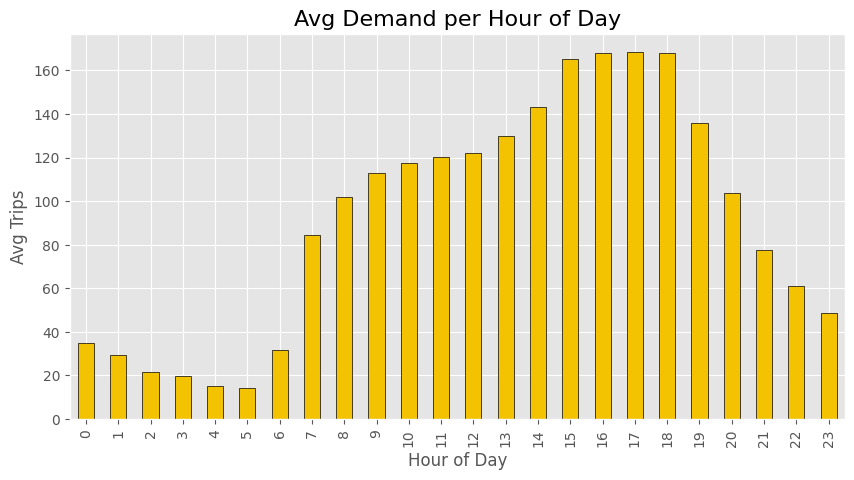

In [7]:
df['hour'] = df['pickup_hour'].dt.hour
avg_hourly = df.groupby('hour')['trip_count'].mean()

plt.figure(figsize=(10,5))
avg_hourly.plot(kind='bar', color=nyc_yellow, edgecolor=nyc_black)
plt.title("Avg Demand per Hour of Day", fontsize=16, color=nyc_black)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Avg Trips", fontsize=12)
plt.show()


Hour-of-day has a consistent effect on taxi demand.
The lowest demand occurs around 5 AM, and the highest around 5 PM due to office commute and evening travel.


Dynamic pricing + more cabs during commute hours boosts revenue.

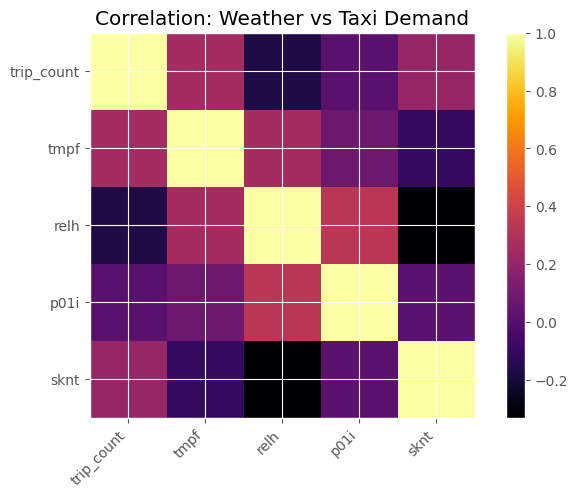

In [8]:
corr = df[['trip_count','tmpf','relh','p01i','sknt']].corr()

plt.figure(figsize=(8,5))
plt.imshow(corr, cmap="inferno")
plt.title("Correlation: Weather vs Taxi Demand", color=nyc_black)
plt.xticks(range(len(corr)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar()
plt.show()


Weather factors show weak but noticeable relationships with demand.
Humidity (relh) shows a slight positive correlation → bad weather days increase taxi use.
Temperature does not correlate strongly due to the cool winter month (Jan only).


Weather influences rider decisions — integrating weather in prediction can improve forecasting accuracy.

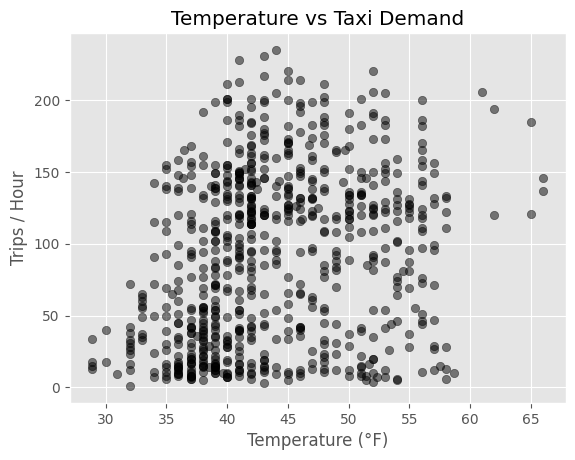

In [9]:
plt.scatter(df['tmpf'], df['trip_count'], color=nyc_black, alpha=0.5)
plt.title("Temperature vs Taxi Demand")
plt.xlabel("Temperature (°F)")
plt.ylabel("Trips / Hour")
plt.show()


Demand tends to increase at colder temperatures (below 45°F).
Riders choose taxis more when weather is uncomfortable for walking.


Predictive pricing/availability should consider temperature drops.